# Data Stuff


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#global pooling
class Net_poll(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, out_channels=64, kernel_size=(3,3), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(in_features=64 *3 *3, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))


        b,c,h,w = x.shape
        x = x.view(b,64,-1)
        x = torch.flatten(x, start_dim=1)  # Flatten the output for the fully connected layer
        #global pooling
        #x = torch.argmax(x,dim=2).float()
        #x = torch.mean(x,dim=2).float()
        x = self.fc(x)
        return x
    
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, out_channels=32, kernel_size=(3,3), stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, out_channels=64, kernel_size=(3,3), stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(in_features=64*3*3, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, start_dim=1)  # Flatten the output for the fully connected layer
        x = self.fc(x)
        return x

model = Net()

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## windowing for 3D Data and normalization

In [ ]:
image = nib.load("../../Data/CT_Phase/CILM_CT_107851_0000.nii.gz")
plt.imshow(image.get_fdata()[:,:,40], cmap="gray")

In [3]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
img_array = sitk.GetArrayFromImage(sitk.ReadImage("../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/CILM_CT_100330_0000.nii.gz"))

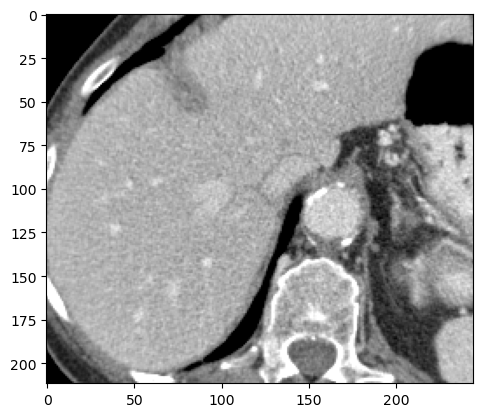

In [4]:
plt.imshow(img_array[40,:,:], cmap="gray")

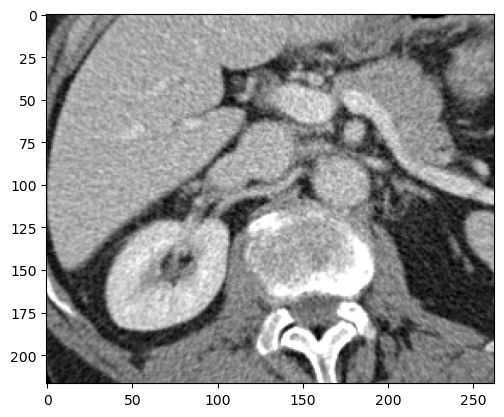

In [11]:
def apply_window_to_volume(batched_volumes, window_center, window_width):
    """
    Apply windowing to a batch of 3D volumes.
    :param batched_volumes: The input batch of 3D volumes.
    :param window_center: The center of the window (window level).
    :param window_width: The width of the window.
    :return: Windowed batch of 3D volumes.
    """
    lower_bound = window_center - window_width / 2
    upper_bound = window_center + window_width / 2
    windowed_batched_volumes = np.clip(batched_volumes, lower_bound, upper_bound)
    return windowed_batched_volumes

image = sitk.ReadImage("../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073/CILM_CT_994000_0000.nii.gz")
image = sitk.GetArrayFromImage(image)

windowed_image = apply_window_to_volume(image, 50, 400)

plt.imshow(windowed_image[0,:,:], cmap='gray')

In [ ]:
plt.imshow(data[:,:,40], cmap='gray')

In [39]:
filename[1:]

'CT_994002_0000.nii.gz'

In [42]:
import os

# 指定文件夹路径
folder_path = '../../Data/CT_Phase/Full_Image_Only_Liver_07075/'

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    print(filename)
    if 'CT' in filename:
        # 找到 'CILM' 并切割字符串
        new_name = filename[1:]
        # 构造完整的旧文件名和新文件名路径
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_name)
        # 重命名文件
        os.rename(old_file, new_file)
        print(f"Renamed {filename} to {new_name}")


_CT_101040_0000.nii.gz
Renamed _CT_101040_0000.nii.gz to CT_101040_0000.nii.gz
_CT_102030_0000.nii.gz
Renamed _CT_102030_0000.nii.gz to CT_102030_0000.nii.gz
_CT_104550_0000.nii.gz
Renamed _CT_104550_0000.nii.gz to CT_104550_0000.nii.gz
_CT_104551_0000.nii.gz
Renamed _CT_104551_0000.nii.gz to CT_104551_0000.nii.gz
_CT_104552_0000.nii.gz
Renamed _CT_104552_0000.nii.gz to CT_104552_0000.nii.gz
_CT_107850_0000.nii.gz
Renamed _CT_107850_0000.nii.gz to CT_107850_0000.nii.gz
_CT_107851_0000.nii.gz
Renamed _CT_107851_0000.nii.gz to CT_107851_0000.nii.gz
_CT_111110_0000.nii.gz
Renamed _CT_111110_0000.nii.gz to CT_111110_0000.nii.gz
_CT_111111_0000.nii.gz
Renamed _CT_111111_0000.nii.gz to CT_111111_0000.nii.gz
_CT_111112_0000.nii.gz
Renamed _CT_111112_0000.nii.gz to CT_111112_0000.nii.gz
_CT_111550_0000.nii.gz
Renamed _CT_111550_0000.nii.gz to CT_111550_0000.nii.gz
_CT_111551_0000.nii.gz
Renamed _CT_111551_0000.nii.gz to CT_111551_0000.nii.gz
_CT_111552_0000.nii.gz
Renamed _CT_111552_0000.nii.g

In [15]:
image_lst = os.listdir('../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073/')
image_lst.sort()
save_path = '../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073_Windowed/'
#os.mkdir(save_path)
for img in image_lst:
    sitk_img = sitk.ReadImage('../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073/' + img)
    img_data = sitk.GetArrayFromImage(sitk_img)

    print(img_data.shape)
    windowed_image = apply_window_to_volume(img_data, 50, 400)

    image = sitk.GetImageFromArray(windowed_image)
    image.SetSpacing(sitk_img.GetSpacing())
    image.SetOrigin(sitk_img.GetOrigin())
    image.SetDirection(sitk_img.GetDirection())


    sitk.WriteImage(image, save_path + img)

    #nib.save(image,  save_path + img )

    #save data
    



(12, 212, 245)
(42, 252, 253)
(37, 286, 274)
(32, 292, 305)
(48, 271, 264)
(35, 205, 294)
(38, 272, 254)
(13, 247, 282)
(22, 230, 251)
(14, 251, 271)
(8, 255, 238)
(55, 244, 299)
(37, 262, 303)
(27, 218, 250)
(23, 256, 277)
(26, 260, 306)
(13, 204, 291)
(28, 244, 300)
(23, 265, 256)
(15, 287, 285)
(32, 217, 242)
(5, 274, 295)
(26, 282, 256)
(12, 228, 286)
(20, 277, 258)
(28, 274, 312)
(17, 228, 259)
(9, 219, 276)
(27, 220, 203)
(22, 242, 282)
(30, 261, 335)
(17, 243, 295)
(17, 300, 255)
(18, 233, 258)
(9, 253, 277)
(12, 271, 262)
(15, 285, 362)
(33, 241, 284)
(8, 196, 299)
(37, 193, 245)
(27, 200, 248)
(6, 240, 270)
(22, 227, 270)
(39, 256, 318)
(41, 245, 289)
(4, 235, 271)
(13, 265, 320)
(22, 266, 238)
(50, 272, 285)
(7, 220, 290)
(7, 183, 213)
(15, 269, 247)
(22, 256, 257)
(20, 256, 262)
(8, 240, 307)
(38, 301, 257)
(23, 275, 286)
(18, 181, 303)
(28, 235, 263)
(50, 332, 294)
(42, 207, 294)
(62, 215, 338)
(22, 234, 249)
(27, 286, 271)
(34, 216, 290)
(35, 266, 297)
(24, 277, 279)
(32, 

In [ ]:
len(os.listdir('../../Data/CT_Phase/Full_image_Liver_slice_07075/'))

## test windowing data


In [ ]:
window_image = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_windowed/CILM_CT_101040_0000.nii.gz').get_fdata()
plt.imshow(window_image[:,:,50], cmap='gray')
name = "CILM_CT_101040_0000.nii.gz"

name[8:14]

In [ ]:
image = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075/CILM_CT_176842_0000.nii.gz').get_fdata()
image.shape

In [ ]:
window_image_2 = nib.load('../../Data/CT_Phase/Full_image_Liver_slice_07075_window/CILM_CT_102030_0000.nii.gz').get_fdata()



In [ ]:
windowed_image.shape

In [ ]:
from monai.networks.nets import resnet10
import torch

model = resnet10(spatial_dims=3,num_classes=2,n_input_channels=1)

img_data = torch.tensor(nib.load('../../Data/CT_Phase/Full_image_Liver_slice/CILM_CT_104552_0000.nii.gz').get_fdata())
img_data.unsqueeze_(0)
img_data.unsqueeze_(0)
model(img_data)

In [ ]:

upload_path_lst = [os.path.join('../../Test_Data/Seg_Data/',file) for file in os.listdir('../../Test_Data/Seg_Data/')]
upload_data = pd.read_csv('../Dataset/Datafiles/samuel_scans_used.csv')
upload_data = upload_data.sort_values(by=['Experiment'])
for i in range(upload_data.shape[0]):
        subject = upload_data.loc[i,'Subject']
        experiment = upload_data.loc[i,'Experiment']
        scan = upload_data.loc[i,'Scan']

        #subject_name,experiment_name,scan_name = subject.label,experiment.label,scan.id
        print(f"this is experiment:{experiment}, scan:{scan}")

将CT label正确分类！

In [ ]:
phase_label = pd.read_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv')
phase_label.sort_values(by=['Experiment']).reset_index(inplace=True,drop=True)
phase_label.to_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv',index=False)

In [ ]:
pd.read_csv('../../Test_Data/CT_Phase/True_Label/Phase_label_all.csv')

In [ ]:
upload_data.reset_index(inplace=True,drop=True)
upload_data.to_csv('../Dataset/Datafiles/samuel_scans_used.csv',index=False)

#check seg data
seg_data = pd.read_csv('../../Test_Data/CT_Phase/Resampled_Phase_Data/Only_0

测试下metrics


In [ ]:
from monai.metrics import get_confusion_matrix,compute_roc_auc
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, f1_score
from torch import tensor
from sklearn.metrics import precision_score, recall_score
import torch
import numpy as np

class Metrics():
    def __init__(self,num_class=2,y_pred=None,y_true_label=None,targets=None):
        """
        args:
            y_pred: list of predicted tensor
            y_true_label: list of true labels
            targets: dicts of targets and their labels
        """
        self.num_class = num_class
        self.four_rate_dic = {str(i):{'tp':0,'fp':0,'tn':0,'fn':0} for i in range(num_class)}
        self.y_true_label = np.array(y_true_label)
        self.y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
        self.y_pred_label = [item for sublist in self.y_pred_label for item in sublist]

        self.y_pred_label = np.array(self.y_pred_label)
        self.y_pred_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_pred_label,dtype=torch.int64),num_classes=self.num_class)
        self.y_true_one_hot = torch.nn.functional.one_hot(torch.tensor(self.y_true_label.tolist(),dtype=torch.int64),num_classes=self.num_class)
    
    def calculate_metrics(self):
        self.metrics = {str(i): {'f1': 0, 'auc': 0, 'accuracy': 0, 'precision': 0, 'recall': 0} for i in range(self.num_class)}

        for i in range(self.num_class):
            true_binary = (self.y_true_label == i).astype(int)
            pred_binary = (self.y_pred_label == i).astype(int)

            self.metrics[str(i)]['f1'] = f1_score(true_binary, pred_binary)
            self.metrics[str(i)]['precision'] = precision_score(true_binary, pred_binary)
            self.metrics[str(i)]['recall'] = recall_score(true_binary, pred_binary)

            if len(np.unique(true_binary)) > 1:
                self.metrics[str(i)]['auc'] = roc_auc_score(true_binary, self.y_pred_one_hot[:, i])

            self.metrics[str(i)]['accuracy'] = accuracy_score(true_binary, pred_binary)

        return self.metrics



    def get_roc(self,average='macro'):
        return compute_roc_auc(self.y_pred_one_hot,self.y_true_one_hot,average)
        

    def get_four_rate(self) -> tensor:
        """
        args:
            y_pred: (B,C) one-hot tensor
            y_true: (B,C) one-hot tensor
        """
        confu_matrix = get_confusion_matrix(self.y_pred_one_hot,self.y_true_one_hot)
        #calculate tp,fp,tn,fn
        for i in range(self.num_class):
            self.four_rate_dic[str(i)]['tp'] += confu_matrix[:,i,0].sum()
            self.four_rate_dic[str(i)]['fp'] += confu_matrix[:,i,1].sum() 
            self.four_rate_dic[str(i)]['tn'] += confu_matrix[:,i,2].sum() 
            self.four_rate_dic[str(i)]['fn'] += confu_matrix[:,i,3].sum()
        return self.four_rate_dic
    
    def get_accuracy(self) -> float:
        """
        args:
            y_pred_label: list of predicted labels
            y_true_label: list of true labels
        """
        accuracy = accuracy_score(self.y_pred_label,self.y_true_label)
        return accuracy
    
    def get_f1_score(self,average='macro') -> float:
        return f1_score(self.y_pred_label,self.y_true_label,average=average)
    

    def generate_metrics_df(self,epoch):

    # 将指标数据整理成列表形式
        metrics_data = []
        for class_id, class_metrics in self.metrics.items():
            data_row = {"epoch": epoch}  # 首先添加 epoch
            data_row.update({"class_id": class_id})  # 然后添加 class_id
            data_row.update(class_metrics)  # 最后添加其他指标
            metrics_data.append(data_row)
        # 创建DataFrame
        df = pd.DataFrame(metrics_data)

        return df



In [ ]:
import numpy as np
# 模拟一些数据
num_classes = 3
y_true = np.array([0,2,1,1,0,2,0]).tolist()
y_pred = [torch.tensor([[0.6, 0.2, 0.2],[0.2, 0.1, 0.7],[0.3, 0.2, 0.5],[0.1, 0.2, 0.7],[0.6, 0.2, 0.2],[0.2, 0.1, 0.7],[0.3, 0.2, 0.5]])]
metrics = Metrics(num_class=num_classes, y_pred=y_pred, y_true_label=y_true)
metrics.calculate_metrics()

import pandas as pd
metrics.generate_metrics_df(3)


In [ ]:
metrics.true_binary

In [ ]:

# 使用Metrics类
metrics = Metrics(num_class=num_classes, y_pred=y_pred, y_true_label=y_true)
metrics_results = metrics.calculate_metrics()

# 打印结果
for class_id, class_metrics in metrics_results.items():
    print(f"Metrics for class {class_id}:")
    for metric_name, metric_value in class_metrics.items():
        print(f"  {metric_name}: {metric_value:.2f}")


In [ ]:
a = [1,2,3]
with open('./4.txt','a') as f:
    for i in a:
        f.write(str(i)+'\n')

In [ ]:
y_pred = [torch.tensor([[0.6, 0.2, 0.2]]), torch.tensor([[0.1, 0.7, 0.2]])]
y_pred = torch.Tensor(np.stack(y_pred))
y_pred_label = [torch.argmax(y_pre,dim=1).detach().cpu().numpy().tolist() for y_pre in y_pred]
y_pred_label = [item for sublist in y_pred_label for item in sublist]


In [ ]:
y_true == 0

# Data Subset

In [ ]:
import numpy as np

np.random.randint()

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import sys
sys.path.append('../')
from Core.Dataset.Dataloader import *
from torch.utils.data import Subset
from Core.Utils.Utility import Balanced_sampler
from monai.transforms import EnsureChannelFirst,Resize,NormalizeIntensity,ToTensor,RandZoom,RandRotate,RandFlip



transform_param = {"transform_methods":[
                        EnsureChannelFirst(),
                        # Data augmentation
                        RandZoom(prob = 0.5, min_zoom=1.0, max_zoom=1.2),
                        RandRotate(range_z = 0.35, prob = 0.5),
                        RandFlip(prob = 0.5),
                        Resize((480,480,40)),
                        #NormalizeIntensity(),
                        # To tensor
                        ToTensor()
                        ]}


data_path = '../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073_Windowed/'
label_path = '../../Data/Mixed_HGP/True_Label/train_cv_0.csv'
Data = DataFiles(data_path,label_path,'HGP_Type')
images_lst = sorted(Data.get_images())
labels_lst = Data.get_labels()
#model =  Swin_Transformer_Classification.SwinUNETR(in_channels=1, out_channels=2, img_size=(256, 256, 128))
tr_dataset =  Image_Dataset(image_files=images_lst,labels=labels_lst,transform_methods=transform_param['transform_methods'],data_aug=True,label_name=None,reader='ITKReader',
                            padding_size=(256,256,62))

tr_dataloader = Data_Loader(dataset=tr_dataset,batch_size=1,num_workers=0).build_train_loader() 

#val_dataset = Image_Dataset(image_files=vali_images,labels=vali_labels,transform_methods=[EnsureChannelFirst(),Resize((256,256,128)),ToTensor()],data_aug=True,label_name=None)
#val_dataloader = Data_Loader(dataset=val_dataset,batch_size=1,num_workers=0).build_vali_loader() 

c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\098986\AppData\Local\anaconda3\envs\CILM\lib\site-packages\monai\transforms\io\array.py:205: UserWarning: required package for reader ITKReader is not installed, or the version doesn't match requirement.
  warnings.warn(


In [24]:
resize = Resize((256,256,-1))
resize(data[0,:,:,:,:]).shape

torch.Size([1, 256, 256, 62])

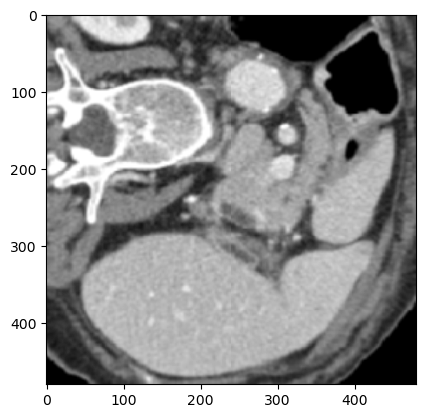

In [18]:
import matplotlib.pyplot as plt
plt.imshow(data[0,0,:,:,50],cmap='gray')

In [10]:
from torch.nn import CrossEntropyLoss
a = torch.tensor([[0.8060, 0.1940]])
CrossEntropyLoss()(a,torch.tensor([1]))

tensor(1.0453)

In [2]:
for i,(data,label) in enumerate(tr_dataloader):
    print(data.shape)
    print(label.shape)
    break

2
torch.Size([1, 480, 480, 62]) 0
torch.Size([1, 1, 480, 480, 62])
torch.Size([1])


In [26]:
for i,(img,label) in enumerate(tr_dataloader):
    print(img.shape)
    print(label.shape)
    break

this is image and labels ../../Data/CT_Phase/Full_Image_Liver_slice_windowed/CILM_CT_101040_0000.nii.gz 2
torch.Size([1, 1, 480, 480, 40])
torch.Size([1])


In [ ]:
import os
import torch 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import torch
from monai.networks.nets import resnet10
import nibabel as nib
from monai.transforms import Compose,Resize,NormalizeIntensity,EnsureChannelFirst,ToTensor

model = resnet10(spatial_dims=3,num_classes=3,n_input_channels=1)
data_1 = tr_dataset[23][0]
data_1 = data_1.unsqueeze(0)
#trans = Compose([EnsureChannelFirst(),Resize((480,480,40)),NormalizeIntensity(),ToTensor()])

model.eval()




In [ ]:
print(model(torch.tensor(np.random.randn(1,1,480,480,40).astype(np.float32))))

In [ ]:
import pandas as pd
import numpy as np
import os

img_lst = os.listdir('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/')
#phase_liver = pd.read_csv('../../Data/CT_Phase/True_Label/Phase_Liver_Label.csv')

phase_all = pd.read_csv('../../Data/CT_Phase/True_Label/Phase_label_all.csv')

# Group by the 'CT_xxxx' column and then apply a function to enumerate each group
# phase_all['scan_num'] = phase_all.groupby('Experiment').cumcount()
# phase_all

# phase_all['Experiment'] = phase_all['Experiment'].astype(str)
# phase_all['scan_num'] = phase_all['scan_num'].astype(str)
# phase_all['scan_num'] = phase_all.apply(lambda x: x['Experiment'] + x['scan_num'], axis=1)



In [ ]:
phase_liver_ = pd.read_table('../../Data/CT_Phase/Liver_slice_info.txt',sep=' ',header=None)
phase_liver__ = phase_liver_[0].values.tolist()


phase_liver_exp = [img[5:14] for img in phase_liver__]
phase_liver = phase_all[phase_all['scan_num'].isin(phase_liver_exp)]

In [ ]:

phase_labels = phase_liver[phase_liver['Phase'] == 1]
#phase_labels['Experiment'] = phase_labels['Experiment'].apply(lambda x: x[8:14])



In [ ]:
phase_liver

In [ ]:
phase_0 = phase_liver[phase_liver['Phase'] == 0]['scan_num'].values.tolist()
phase_1 = phase_liver[phase_liver['Phase'] == 1]['scan_num'].values.tolist()

In [ ]:


#extract img_lst with phase_0

img_lst = [img for img in img_lst if img[5:14] in phase_1]

In [ ]:
#将phase0里的copy 一份 到新文件夹 Full_Image_Liver_slice_07075_windowed_phase0

import shutil
os.mkdir('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed_phase1/')

for img in img_lst:
    shutil.copyfile('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/'+img,'../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed_phase1/'+img)

#check the number of images in phase0


In [ ]:
img_lst_ct = [img[5:14] for img in img_lst if img[5:14] in phase_1]

In [ ]:
Sub_tr = Subset(tr_dataset,range(20))
Sub_label = [Sub_tr[i][1] for i in range(20)]
sampler = Balanced_sampler(Sub_label,3)
#Sub_tr[20][1]
Sub_loader = Data_Loader(dataset=Sub_tr,batch_size=1,num_workers=0,sampler=sampler).build_train_loader()




# Transform nifti to png

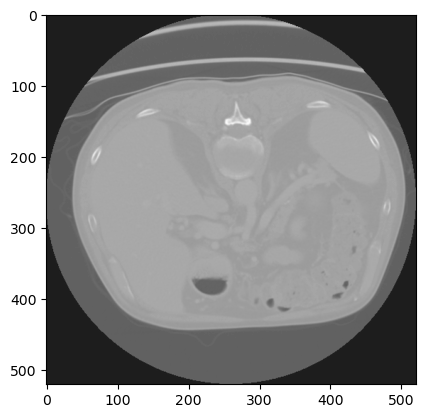

In [8]:
img_1 = sitk.GetArrayFromImage(sitk.ReadImage('../../Data/CT_Phase/Full_Image_Liver_07075/CILM_CT_101040_0000.nii.gz'))
plt.imshow(img_1[89,:,:],cmap='gray')

In [46]:
import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
img_lst = os.listdir('../../Data/CT_Phase/Full_Image_Liver_07075/')


#random choose 50 images
import random
random.seed(2021)

random.shuffle(img_lst)
img_lst = img_lst[:50]

img_lst_CT = [img[5:14] for img in img_lst]
img_lst = img_lst[:50]
phase_liver_csv = phase_liver[phase_liver['scan_num'].isin(img_lst_CT)]


img_label = phase_liver_csv['Phase'].values.tolist()

NameError: name 'phase_liver_csv' is not defined

In [ ]:
img_lst

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_array[0,:,:],cmap='gray')

In [49]:
os.mkdir("../../Data/CT_Phase/Full_Image_Only_Liver_07075_Windowed_2D/")

In [59]:
img[3:9]

'198760'

In [60]:
img_label = pd.read_csv('../../Data/CT_Phase/True_Label/Phase_Liver_Label.csv')['Phase'].values.tolist()


# 初始化一个空的DataFrame，用于存储信息
df_lst = []

# 假设img_lst是NIfTI文件名的列表，img_label是对应的标签列表
for img, label in zip(img_lst, img_label):
    # 读取NIfTI图像
    img_array = sitk.GetArrayFromImage(sitk.ReadImage('../../Data/CT_Phase/Full_Image_Only_Liver_07075_Windowed/'+img))

    # 遍历每个切片
    for slice_index in range(img_array.shape[0]):
        # 为每个切片构建一个唯一的Study ID
        study_id = f"Study_{img[3:9]}"
        img_name = f"Study_id_{img[3:9]}_slice_{slice_index}"
        # 假设你会将每个切片保存为PNG文件，构建文件路径
        # 你需要编写代码将NIfTI切片保存为PNG格式
        png_path = f"../../Data/CT_Phase/Full_Image_Only_Liver_07075_Windowed_2D/{img_name}.png"
        plt.imsave(png_path,img_array[slice_index,:,:],cmap='gray')
        png_path_csv = f"../../Data/CT_Phase/Full_Image_Only_Liver_07075_Windowed_2D/{img_name}.png"

        # 将信息添加到DataFrame
        df_lst.append({"Study_ID": study_id, "Path": png_path_csv, "Label": label,"Slice":slice_index})
    
    

# 保存DataFrame到CSV文件
df = pd.DataFrame(df_lst)

    
    

In [63]:
df.to_csv("../../Data/CT_Phase/Only_Liver_07075_windowed_2D_data.csv", index=False)

In [128]:
df.to_csv('../../Data/CT_Phase/Slice_info_test.csv')

In [129]:
random_lst = df.Study_ID.unique().tolist()
random.shuffle(random_lst)
random_lst
train_lst = random_lst[:int(len(random_lst)*0.7)]



In [130]:
for x in train_lst:
    random_lst.remove(x)

In [131]:
vali_lst = random_lst[:int(len(random_lst)*0.5)]

In [132]:
for x in vali_lst:
    random_lst.remove(x)


In [133]:
test_set = random_lst

In [134]:
train_data = df[df['Study_ID'].isin(train_lst)]
vali_data = df[df['Study_ID'].isin(vali_lst)]
test_data = df[df['Study_ID'].isin(test_set)]

train_data.to_csv('../../Data/CT_Phase/Slice_info_train.csv',index=False)
vali_data.to_csv('../../Data/CT_Phase/Slice_info_vali.csv',index=False)
test_data.to_csv('../../Data/CT_Phase/Slice_info_test.csv',index=False)


In [ ]:
train_data

In [ ]:
img_label = phase_liver['Phase'].values.tolist()


In [ ]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from monai.transforms import NormalizeIntensity
image_1 =  sitk.ReadImage('../../Data/CT_Phase/Full_Image_Liver_slice_07075_windowed/CILM_CT_101040_0000.nii.gz')
image_1_array = sitk.GetArrayFromImage(image_1)
trans = NormalizeIntensity()
image_1_norm = trans(image_1_array)
plt.imshow(image_1_norm[50,:,:],cmap='gray')





In [ ]:
from collections import Counter
Counter(labels)

In [ ]:

labels = []
for i,(data,label) in enumerate(Sub_loader):
    labels.append(label)



In [ ]:
labels

In [ ]:
import numpy as np
chaneel = EnsureChannelFirst()
resize_ = Resize((480,480,40))
random_data = np.random.rand(480,480,40)
random_data = trans(random_data)

In [ ]:
EnsureChannelFirst(channel_dim=)(random_data).shape

# Xnat


In [16]:
import xnat
import pandas as pd

xnat_session = xnat.connect('https://bigr-rad-xnat.erasmusmc.nl',user='yliu',password='x37vnp78')

project_name = "HCCSorafenib"




TypeError: 'XNATListing' object is not callable

In [48]:
xnat_session.projects[project_name].subjects[str(data_1[0])].experiments['CT_28615'].scans[1]

<CtScanData zc 4F-lever  3.0  B31f (5)>

In [72]:
#make data subject column str, scan column int
data['Subject'] = data['Subject'].astype(str)

data['Scan'] = data['Scan'].astype(int)


data_1 = data['Subject']


data_loaded = pd.read_csv('../../Data/HGC/HCCSorafenibPortoVenous Phase.csv', 
                          dtype={'Subject': str, 'Scan': int})

,Unnamed: 0,Subject,Experiment,Insert_Date,Scan,Series_description,AU,Modality,Manufacturer,Headtype,...,convolution_kernel,seriesdate,acquisition_type,gender,age,birthdate,patient_ID,scanning_sequence,model_name,patient_position
0,0,114427925,CT_28615,26-10-2023,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,...,T20f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
1,1,114427925,CT_28615,26-10-2023,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
2,2,114427925,CT_28615,26-10-2023,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS


In [76]:
data = pd.read_csv('../../Data/HGC/HCCSorafenibPortoVenous Phase.csv')

data_1 = data['Subject']
data_loaded['Subject'][0]



#data.to_csv('../../Data/HGC/HCCSorafenibPortoVenous Phase.csv',index=False)

'114427925'

# WORC

In [5]:
import os
#get absolute path
os.path.abspath('../../Data/Mixed_HGP/')

'c:\\Users\\098986\\Intership_CILM\\Data\\Mixed_HGP'

In [91]:
import torch
torch.nn.CrossEntropyLoss()

'CILM_CT_101040_0000.nii.gz'

In [93]:
os.mkdir('../../Data/CT_Phase/WORC_Data/')

In [94]:
import os
import shutil
patients_info = os.listdir('../../Data/CT_Phase/Full_Image_Liver/')
mask_info = os.listdir('../../Data/CT_Phase/Task_502_Phase_Data/')
insuifx = "Patients_"
for patient ,mask in zip(patients_info,mask_info):
    print(patient[8:14])
    os.mkdir('../../Data/CT_Phase/WORC_Data/'+insuifx+patient[8:14])
    #copy file and rename
    shutil.copyfile('../../Data/CT_Phase/Full_Image_Liver/'+patient,'../../Data/CT_Phase/WORC_Data/'+insuifx+patient[8:14]+'/'+'image.nii.gz')
    shutil.copyfile('../../Data/CT_Phase/Task_502_Phase_Data/' + mask,'../../Data/CT_Phase/WORC_Data/'+insuifx+patient[8:14]+'/'+'mask.nii.gz')


101040
102030
104550
104551
104552
107850
107851
111110
111111
111112
111550
111551
111552
111553
114470
114471
114472
116560
116561
121900
121901
125530
125531
125532
129310
129311
129570
134190
134191
134192
134193
137140
137141
137142
139990
139991
139992
139993
140250
140251
140252
141460
141461
141510
141511
141512
141513
142990
142991
147760
147761
150140
155660
155661
155662
155663
158130
158131
160780
160781
160782
160783
164660
164661
164662
164663
166410
176840
176841
176842
176843
190460
190820
190821
190822
190823
193810
193811
193812
197380
198760
198761
198762
198763
199010
199011
199012
199013
201850
201851
201852
201853
202990
203700
203701
206460
209850
210170
210171
211030
211140
211141
211142
215020
215640
219190
219270
219271
219272
219273
227620
227621
228290
228291
228292
229580
229581
229582
229583
229584
232880
232881
232882
232883
233500
235170
243292
246500
246501
246502
246503
246504
255220
255221
256150
256151
256152
258480
258481
259630
259631
259632
261400

# Yaml configuration

HGC

In [85]:
import pandas as pd
import SimpleITK as sitk
import os
#read all excel files

HGC_data_new = pd.read_excel('../../Data/HGC/Data_info/HCCSorafenibPortoVenous Phase v2.xlsx')
HGC_data_old = pd.read_excel('../../Data/HGC/Data_info/HCCSorafenibPortoVenous Phase.xlsx')
HGC_data_inter = pd.merge(HGC_data_new,HGC_data_old,on=['Experiment'],indicator=True)


In [86]:
# find intersection of two dataframes
HGC_data_inter = pd.merge(HGC_data_new,HGC_data_old,on=['Subject','Scan'],indicator=True)

# 假设 HGC_data_new 和 HGC_data_old 是你的两个DataFrame

# 为两个DataFrame设置多列索引
HGC_data_new.set_index(['Subject', 'Scan'], inplace=True)
HGC_data_old.set_index(['Subject', 'Scan'], inplace=True)

# 找出两个DataFrame的差异
# 在 HGC_data_new 中但不在 HGC_data_old 中的数据
diff_new = HGC_data_new[~HGC_data_new.index.isin(HGC_data_old.index)].reset_index()

# 在 HGC_data_old 中但不在 HGC_data_new 中的数据
diff_old = HGC_data_old[~HGC_data_old.index.isin(HGC_data_new.index)].reset_index()

# 合并两个差异DataFrame
HGC_data_difference = pd.concat([diff_new, diff_old], ignore_index=True)


In [87]:
#get files that are segmentated
seg_data = pd.read_table('../../Data/HGC/Data_info/masks.txt',sep=' ',header=None)
seg_data

,0
0,HCCSorafenib_CT_100170.nii.gz
1,HCCSorafenib_CT_100171.nii.gz
2,HCCSorafenib_CT_100172.nii.gz
3,HCCSorafenib_CT_100173.nii.gz
4,HCCSorafenib_CT_100174.nii.gz
...,...
487,HCCSorafenib_CT_155097.nii.gz
488,HCCSorafenib_CT_1565310.nii.gz
489,HCCSorafenib_CT_156533.nii.gz
490,masks.txt


In [88]:
HGC_data_inter['new'] = HGC_data_inter.groupby(['Subject']).cumcount()
#merge Experiment_x and new
HGC_data_inter['new'] = HGC_data_inter['Experiment_x'] + HGC_data_inter['new'].astype(str) 

In [89]:
HGC_data_inter
Prefix = 'HCCSorafenib_'
Suffix = '.nii.gz'
HGC_data_inter['new'] = Prefix + HGC_data_inter['new'] + Suffix 

In [90]:
HGC_data_inter

,Subject,Experiment_x,Insert_Date_x,Scan,Series_description_x,AU_x,Modality_x,Manufacturer_x,Headtype_x,Subtype_x,...,acquisition_type_y,gender_y,age_y,birthdate_y,patient_ID_y,scanning_sequence_y,model_name_y,patient_position_y,_merge,new
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286150.nii.gz
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286151.nii.gz
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286152.nii.gz
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286153.nii.gz
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286154.nii.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,114428201,CT_11600,2023-10-26,11,D80 Onco ThAb 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,HCCSorafenib_CT_116006.nii.gz
2180,114428201,CT_11600,2023-10-26,12,D80 Onco ThAb 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,HCCSorafenib_CT_116007.nii.gz
2181,114428201,CT_11600,2023-10-26,13,D80 Onco ThAb 3.0 MPR,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,HCCSorafenib_CT_116008.nii.gz
2182,114428201,CT_11600,2023-10-26,14,D80 Onco ThAb 1.0 B70f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,HCCSorafenib_CT_116009.nii.gz


In [98]:
HGC_data_inter_left = HGC_data_inter[~HGC_data_inter['new'].isin(seg_data[0].values.tolist())]

In [95]:
test = 'HCCSorafenib_CT_286150.nii.gz'
test_split = test.split('.')[1]


'HCCSorafenib_CT_286150.nii.gz'

In [99]:
HGC_data_inter_left['new'] = HGC_data_inter_left['new'].apply(lambda x: x.split('.')[0]  +'_0000.nii.gz')

C:\Users\098986\AppData\Local\Temp\ipykernel_23072\3902024275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HGC_data_inter_left['new'] = HGC_data_inter_left['new'].apply(lambda x: x.split('.')[0]  +'_0000.nii.gz')


In [100]:
HGC_data_inter_left

,Subject,Experiment_x,Insert_Date_x,Scan,Series_description_x,AU_x,Modality_x,Manufacturer_x,Headtype_x,Subtype_x,...,acquisition_type_y,gender_y,age_y,birthdate_y,patient_ID_y,scanning_sequence_y,model_name_y,patient_position_y,_merge,new
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286150_0000.nii.gz
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286151_0000.nii.gz
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286152_0000.nii.gz
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286153_0000.nii.gz
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,HCCSorafenib_CT_286154_0000.nii.gz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2168,114428198,CT_26616,2023-10-25,10,D80 th-abd 3.0 MPR sag,NaN,CT,SIEMENS,CT,CT,...,NaN,M,060Y,NaN,CT_26616,NaN,SOMATOM Definition Edge,HFS,both,HCCSorafenib_CT_266165_0000.nii.gz
2169,114428198,CT_26616,2023-10-25,11,D80 th-abd 3.0 I70f 3,X,CT,SIEMENS,CT,CT,...,NaN,M,060Y,NaN,CT_26616,NaN,SOMATOM Definition Edge,HFS,both,HCCSorafenib_CT_266166_0000.nii.gz
2170,114428198,CT_26616,2023-10-25,12,D80 th-abd 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,NaN,M,060Y,NaN,CT_26616,NaN,SOMATOM Definition Edge,HFS,both,HCCSorafenib_CT_266167_0000.nii.gz
2171,114428198,CT_26616,2023-10-25,13,D80 th-abd 8.0 MIP ax,NaN,CT,SIEMENS,CT,CT,...,NaN,M,060Y,NaN,CT_26616,NaN,SOMATOM Definition Edge,HFS,both,HCCSorafenib_CT_266168_0000.nii.gz


In [106]:
row

Subject                                          114428198
Experiment_x                                      CT_26616
Insert_Date_x                                   2023-10-25
Scan                                                    14
Series_description_x            D3' 4F Lever  3.0  I40f  4
                                       ...                
scanning_sequence_y                                    NaN
model_name_y                       SOMATOM Definition Edge
patient_position_y                                     HFS
_merge                                                both
new                     HCCSorafenib_CT_266169_0000.nii.gz
Name: 2172, Length: 94, dtype: object

In [111]:
import json
nnunt_out_path = '/data/scratch/r098986/nnUnet_Seg/nnUNet_raw_data_base/nnUNet_raw_data/'
task = 'Task503_HGCSorafenib_Data'
scan_path = nnunt_out_path + task + "/imagesTr/"
list_of_dicts = []
for _,row in HGC_data_inter_left.iterrows():
    dict = {"image":"./imagesTr/"+row['new'],"label":"./labelsTr/"+row['new']}
    list_of_dicts.append(dict)


# boilerplate json file
data = {
    "name": f"{task}",
    "description": f"{task}",
    "reference": "Erasmus Medical Centre",
    "licence": "Not applicable",
    "release": "Not applicable",
    "tensorImageSize": "3D",
    "modality": {"0": "3D"
    },

    "labels": {
        "0": "background",
        "1": "organ",
        "2": "tumor"
    },
    "numTraining": 10,
    "numTest": 0,
    "training": list_of_dicts,# add list of dicts


"test": []
}

# save the json file
with open('./dataset.json','w') as outfile:
    json.dump(data, outfile, indent=2)

In [109]:
os.getcwd()

'c:\\Users\\098986\\Intership_CILM\\CRLM_Internship_Project\\Jupyter_Test'

In [ ]:
for row in HGC_data_inter_left.iterrows():
    dict = {"image":"./imagesTr/"+row['new'],"label":"./labelsTr/"+row['new']}
    list_of_dicts.append(dict)

In [71]:
HGC_data_inter

,Subject,Experiment_x,Insert_Date_x,Scan,Series_description_x,AU_x,Modality_x,Manufacturer_x,Headtype_x,Subtype_x,...,acquisition_type_y,gender_y,age_y,birthdate_y,patient_ID_y,scanning_sequence_y,model_name_y,patient_position_y,_merge,new
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,0
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,1
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,2
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,3
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS,both,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,114428201,CT_11600,2023-10-26,11,D80 Onco ThAb 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,6
2180,114428201,CT_11600,2023-10-26,12,D80 Onco ThAb 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,7
2181,114428201,CT_11600,2023-10-26,13,D80 Onco ThAb 3.0 MPR,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,8
2182,114428201,CT_11600,2023-10-26,14,D80 Onco ThAb 1.0 B70f,NaN,CT,SIEMENS,CT,CT,...,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS,both,9


In [47]:
#random select 10 rows in inter dataframe
import random
random.seed(2021)
random_lst = random.sample(range(0, 2000), 10)
HGC_data_inter.iloc[random_lst]

,Subject,Experiment_x,Insert_Date_x,Scan,Series_description_x,AU_x,Modality_x,Manufacturer_x,Headtype_x,Subtype_x,...,seriesdate_y,acquisition_type_y,gender_y,age_y,birthdate_y,patient_ID_y,scanning_sequence_y,model_name_y,patient_position_y,_merge
1712,114428134,CT_13059,2023-10-25,20,Ven. Lever DE 3.0 MPR cor F_0.6,NaN,CT,SIEMENS,CT,CT,...,20160629.0,NaN,M,062Y,NaN,CT_13059,NaN,SOMATOM Drive,HFS,both
827,114428032,CT_13841,2023-10-25,7,art Lever_DE 3.0 Br40 3 F_0.7,NaN,CT,SIEMENS,CT,CT,...,20201021.0,NaN,M,074Y,NaN,CT_13841,NaN,SOMATOM Drive,HFS,both
1757,114428139,CT_23283,2023-10-25,13,D70 DE_ThAbd 1.0 Bl57 3 F_0.4,NaN,CT,SIEMENS,CT,CT,...,20180411.0,NaN,M,063Y,NaN,CT_23283,NaN,SOMATOM Force,HFS,both
1289,114428079,CT_81858,2023-10-25,14,ONCO ThAbd 8.0 MIP ax ax,NaN,CT,SIEMENS,CT,CT,...,20180222.0,NaN,F,044Y,NaN,CT_81858,NaN,Sensation 64,HFS,both
1114,114428057,CT_32488,2023-10-25,604,iodine Art Lever DE 3.0 Q30f 3 _VNC_S11_S...,NaN,CT,SIEMENS,CT,CT,...,20170412.0,NaN,M,061Y,NaN,CT_32488,NaN,SOMATOM Drive,HFS,both
566,114428000,CT_47635,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,20150227.0,NaN,F,045Y,NaN,CT_47635,NaN,SOMATOM Definition AS+,HFS,both
506,114427991,CT_11681,2023-10-25,12,Onco ThAbd 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,20151024.0,NaN,F,045Y,NaN,CT_11681,NaN,SOMATOM Force,HFS,both
1799,114428150,CT_23475,2023-10-26,15,D3' 4F Lever 3.0 Br40 3,NaN,CT,SIEMENS,CT,CT,...,20141128.0,NaN,M,073Y,NaN,CT_23475,NaN,SOMATOM Force,HFS,both
1300,114428081,CT_79602,2023-10-25,4,Art. Lever DE 3.0 I40f 3 C_AuSn120kV,NaN,CT,SIEMENS,CT,CT,...,20170418.0,NaN,F,060Y,NaN,CT_79602,NaN,SOMATOM Definition Edge,HFS,both
70,114427932,CT_23240,2023-10-25,605,VNC Ven. ThAbd DE 3.0 Q30f 3 _VNC_S21_S22_1,NaN,CT,SIEMENS,CT,CT,...,20160721.0,NaN,M,026Y,NaN,CT_23240,NaN,SOMATOM Drive,HFS,both


In [29]:
HGC_data_new

,Subject,Experiment,Insert_Date,Scan,Series_description,AU,Modality,Manufacturer,Headtype,Subtype,...,convolution_kernel,seriesdate,acquisition_type,gender,age,birthdate,patient_ID,scanning_sequence,model_name,patient_position
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,T20f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,B70f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,114428201,CT_11600,2023-10-26,11,D80 Onco ThAb 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,"['I70f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2174,114428201,CT_11600,2023-10-26,12,D80 Onco ThAb 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2175,114428201,CT_11600,2023-10-26,13,D80 Onco ThAb 3.0 MPR,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2176,114428201,CT_11600,2023-10-26,14,D80 Onco ThAb 1.0 B70f,NaN,CT,SIEMENS,CT,CT,...,B70f,20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS


,Subject,Experiment,Insert_Date,Scan,Series_description,AU,Modality,Manufacturer,Headtype,Subtype,...,convolution_kernel,seriesdate,acquisition_type,gender,age,birthdate,patient_ID,scanning_sequence,model_name,patient_position
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,T20f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,B70f,20140707,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,114428201,CT_11600,2023-10-26,11,D80 Onco ThAb 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,"['I70f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2174,114428201,CT_11600,2023-10-26,12,D80 Onco ThAb 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2175,114428201,CT_11600,2023-10-26,13,D80 Onco ThAb 3.0 MPR,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2176,114428201,CT_11600,2023-10-26,14,D80 Onco ThAb 1.0 B70f,NaN,CT,SIEMENS,CT,CT,...,B70f,20141008,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS


,Subject,Experiment,Insert_Date,Scan,Series_description,AU,Modality,Manufacturer,Headtype,Subtype,...,convolution_kernel,seriesdate,acquisition_type,gender,age,birthdate,patient_ID,scanning_sequence,model_name,patient_position
0,114427925,CT_28615,2023-10-26,1,Topogram 0.6 T20f,NaN,CT,SIEMENS,CT,CT,...,T20f,20140707.0,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
1,114427925,CT_28615,2023-10-26,5,zc 4F-lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707.0,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
2,114427925,CT_28615,2023-10-26,6,Art. 4F Lever 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707.0,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
3,114427925,CT_28615,2023-10-26,9,Onco HaThAb 3.0 B31f,NaN,CT,SIEMENS,CT,CT,...,B31f,20140707.0,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
4,114427925,CT_28615,2023-10-26,11,Onco HaThAb 3.0 B70f,X,CT,SIEMENS,CT,CT,...,B70f,20140707.0,NaN,M,062Y,NaN,CT_28615,NaN,SOMATOM Definition AS+,HFS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,114428201,CT_11600,2023-10-26,11,D80 Onco ThAb 1.0 I70f 3,NaN,CT,SIEMENS,CT,CT,...,"['I70f', '3']",20141008.0,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2220,114428201,CT_11600,2023-10-26,12,D80 Onco ThAb 3.0 MPR cor,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008.0,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2221,114428201,CT_11600,2023-10-26,13,D80 Onco ThAb 3.0 MPR,NaN,CT,SIEMENS,CT,CT,...,"['I40f', '3']",20141008.0,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS
2222,114428201,CT_11600,2023-10-26,14,D80 Onco ThAb 1.0 B70f,NaN,CT,SIEMENS,CT,CT,...,B70f,20141008.0,NaN,M,035Y,NaN,CT_11600,NaN,SOMATOM Definition Flash,HFS


In [36]:
#only with *.nii.gz
#get all mask files
mask_lst = os.listdir('../../Data/HGC/HGC_seg_mask/')
mask_lst = [mask for mask in mask_lst if mask.endswith('.nii.gz')]
#get mask basepath
mask_lst = [os.path.join('../../Data/HGC/HGC_seg_mask/',mask) for mask in mask_lst]

removed_lst = []



import os

import os

def delete_if_1kb(file_path_lst, removed_lst):
    for file_path in file_path_lst:
        try:
            # 获取文件大小
            size = os.path.getsize(file_path)

            # 将大小转换为KB
            size_kb = size / 1024

            # 检查文件大小是否为1KB
            if size_kb <= 1:
                # 删除文件
                os.remove(file_path)
                print(f"文件已删除：{file_path}")
                removed_lst.append(os.path.basename(file_path))
            else:
                print(f"文件大小不是1KB，保留文件：{file_path}")

        except FileNotFoundError:
            print(f"文件未找到：{file_path}")
        except Exception as e:
            print(f"错误：{e}")



# 初始化被删除的文件列表
removed_files = []

# 执行删除操作
delete_if_1kb(mask_lst, removed_files)

# 打印被删除的文件
print("被删除的文件名：", removed_files)





文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_100170.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_100171.nii.gz
文件已删除：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_100172.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_100173.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_100174.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_101270.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_101271.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012710.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012711.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012712.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012713.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012714.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafenib_CT_1012715.nii.gz
文件大小不是1KB，保留文件：../../Data/HGC/HGC_seg_mask/HCCSorafeni

In [73]:
#extract removed lst from HGC_data,use isin
HGC_data_exps = pd.read_csv('../../Data/HGC/All_HGC_exps.csv')
mask_lst = os.listdir('../../Data/HGC/HGC_seg_mask/')
mask_lst = [mask for mask in mask_lst if mask.endswith('.nii.gz')]
#get path
mask_lst = [os.path.join('../../Data/HGC/HGC_seg_mask/',mask) for mask in mask_lst]
mask_lst = [os.path.basename(mask) for mask in mask_lst]


In [78]:
#first divide by .
mask_lst = [mask.split('.')[0] for mask in mask_lst]
#then divide by _
mask_lst = [mask.split('_')[1]+'_'+mask.split('_')[2] for mask in mask_lst]

In [97]:
HGC_data_exps_1 = HGC_data_exps[HGC_data_exps['exps'].isin(mask_lst)]
HGC_data_exps_1.sort_values(by=['Experiment'],ascending=False).reset_index(inplace=True,drop=True)
HGC_data_exps_1
#HGC_data



In [113]:
import pandas as pd
HGP_scans = pd.read_csv('../../Data/Mixed_HGP/True_Label/scans_used_all_info.csv')
import pandas as pd

# 假设你已经有了一个名为 df 的DataFrame，其中包含你的数据
# 例如，df = pd.read_csv('your_file.csv')

# 对特定列（假设列名为 'ID'）进行分组，并创建一个新列
HGP_scans['exps'] = HGP_scans.groupby('Experiment').cumcount()

# 然后将这个数字添加到原始ID上
HGP_scans['exps'] = HGP_scans['Experiment'].astype(str) + HGP_scans['exps'].astype(str)

# 查看结果

(249,)

In [124]:
import matplotlib.pyplot as plt
import numpy as np
def get_spacing_distribution(data_path,method='median'):
    """
    data_path:data_path only incluede *nii.gz files
    """

    spacing_x, spacing_y, spacing_z = [], [], []
    data_lst = os.listdir(data_path)
    data_lst = [data for data in data_lst if data.endswith('.nii.gz')]

    for data in data_lst:
        data = sitk.ReadImage(os.path.join(data_path, data))
        data_spacing = data.GetSpacing()
        spacing_x.append(data_spacing[0])
        spacing_y.append(data_spacing[1])
        spacing_z.append(data_spacing[2])

    plt.hist(spacing_x, bins=100)
    plt.show()
    plt.hist(spacing_y, bins=100)
    plt.show()
    plt.hist(spacing_z, bins=100)
    plt.show()
    print('ss')
    spacing_x, spacing_y, spacing_z = np.array(spacing_x), np.array(spacing_y), np.array(spacing_z)
    spacing_x, spacing_y, spacing_z = getattr(np, method)(spacing_x), getattr(np, method)(spacing_y), getattr(np, method)(spacing_z)

    return spacing_x, spacing_y, spacing_z

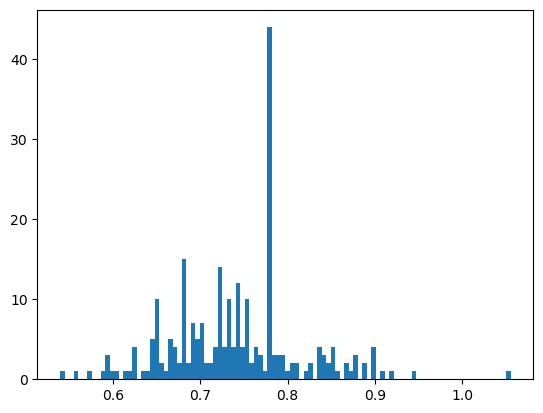

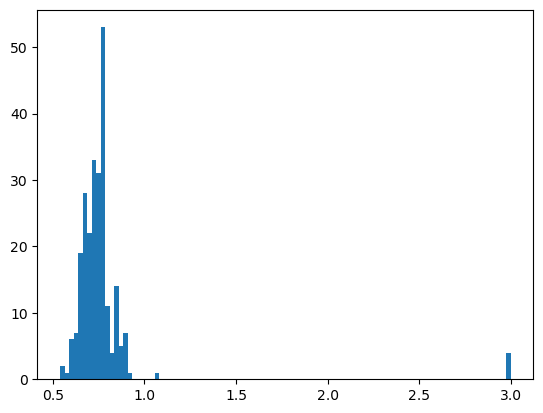

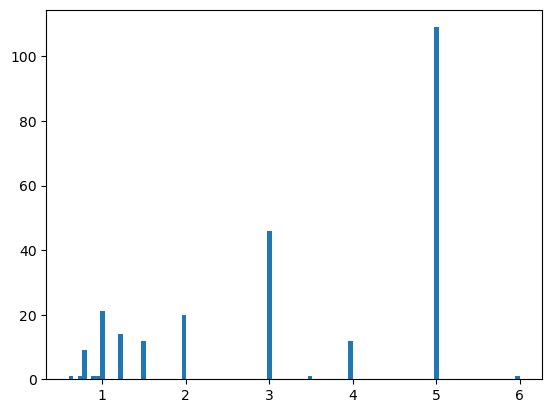

ss


In [125]:
spacing_x,spacing_y,spacing_z = get_spacing_distribution('../../Data/Mixed_HGP/Mixed_HGP/')

# statistics of images data


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import SimpleITK as sitk
slice_info = pd.read_csv('../../Data/Mixed_HGP/True_Label/Mixed_HGP_Slice_info.csv')
slice_info['row_range'] = slice_info['max_row'] - slice_info['min_row']
slice_info['col_range'] = slice_info['max_col'] - slice_info['min_col'] 
slice_info['slice_range'] = slice_info['max_slice'] - slice_info['min_slice']

In [2]:
data_info = os.listdir('../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/')
#statistics of the shape
shape_dic = {'row':[],'col':[],'slice':[]}
for data in data_info:
    data = sitk.ReadImage(os.path.join('../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/',data))
    data = sitk.GetArrayFromImage(data)
    shape_dic['slice'].append(data.shape[0])
    shape_dic['row'].append(data.shape[1])
    shape_dic['col'].append(data.shape[2])


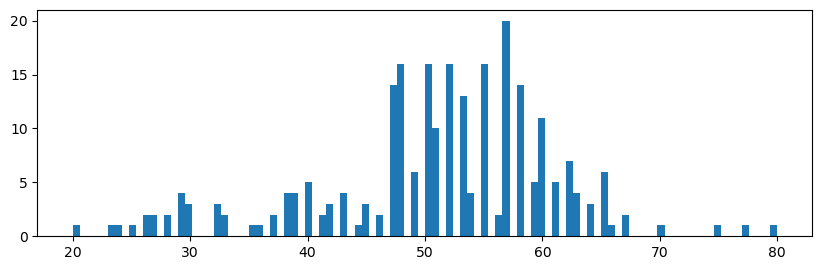

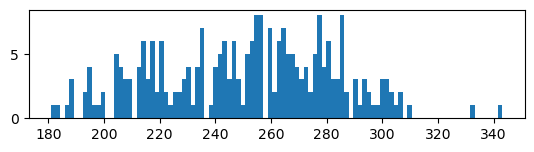

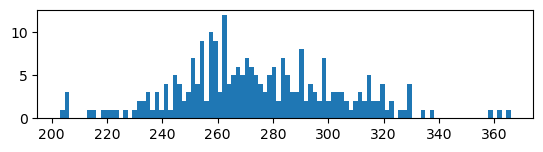

In [3]:
slice_info = pd.DataFrame(shape_dic)
plt.figure(figsize=(10,10))
#subfigure
plt.subplot(3,1,1)
plt.hist(slice_info['slice'],bins=100)
plt.show()
plt.subplot(3,1,2)
plt.hist(slice_info['row'],bins=100)
plt.show()
plt.subplot(3,1,3)
plt.hist(slice_info['col'],bins=100)
plt.show()


In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
data_info = os.listdir('../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073/')
#statistics of the shape
shape_dic = {'row':[],'col':[],'slice':[]}
for data in data_info:
    data = sitk.ReadImage(os.path.join('../../Data/Mixed_HGP/Mixed_HGP_lv_with_tumor_07073/',data))
    data = sitk.GetArrayFromImage(data)
    shape_dic['slice'].append(data.shape[0])
    shape_dic['row'].append(data.shape[1])
    shape_dic['col'].append(data.shape[2])


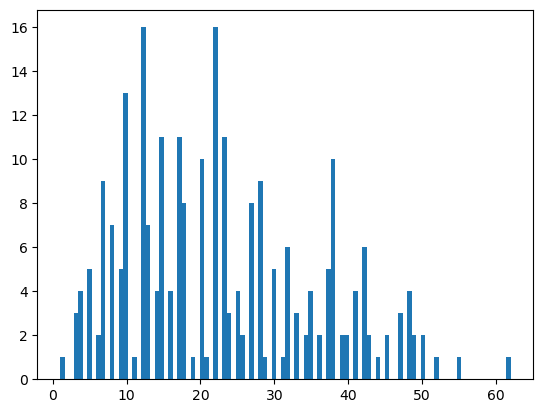

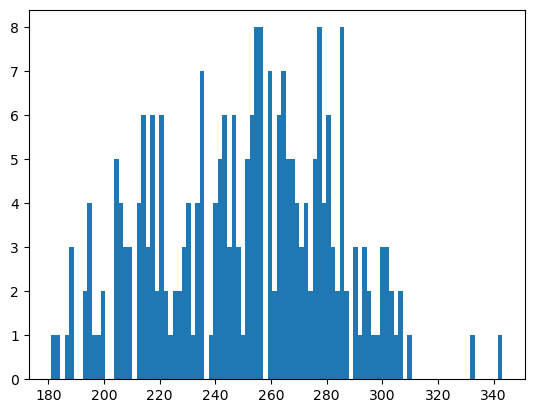

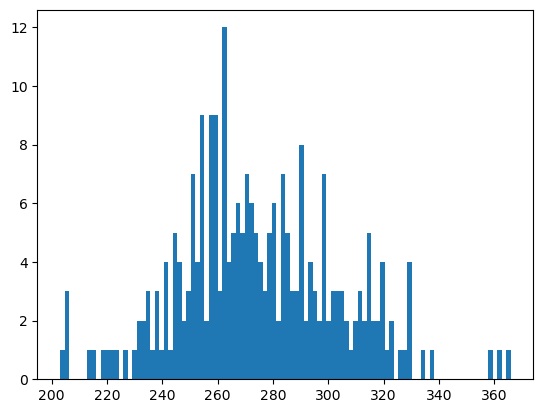

In [4]:
slice_info = pd.DataFrame(shape_dic)
plt.hist(slice_info['slice'],bins=100)
plt.show()
plt.hist(slice_info['row'],bins=100)
plt.show()
plt.hist(slice_info['col'],bins=100)
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
tumor_slice = pd.read_csv('../../Data/Mixed_HGP/True_Label/Mixed_HGP_Tumor_Bbox.csv')
liver_slice = pd.read_csv('../../Data/Mixed_HGP/True_Label/Mixed_HGP_Slice_info.csv')

liver_slice['tumor_min_slice'] = tumor_slice['min_slice']
liver_slice['tumor_max_slice'] = tumor_slice['max_slice']

In [10]:
#tumor_min_slice set to min(0,tumor_min_slice-)

liver_slice['tumor_min_slice'] = liver_slice.apply(lambda x: max(0,x['tumor_min_slice']),axis=1)

In [12]:
liver_slice['tumore_slice_range'] = liver_slice['tumor_max_slice'] - liver_slice['tumor_min_slice']

(array([  8.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          6.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
        210.]),
 array([18.  , 18.18, 18.36, 18.54, 18.72, 18.9 , 19.08, 19.26, 19.44,
        19.62, 19.8 , 19.98, 20.16, 20.34, 20.52, 20.7 , 20.88, 21.06,
        21.24, 21.42, 21.6 , 21.78, 21.96, 22.14, 22.32, 22.5 , 22.68,
        22.86, 23.04, 23.22, 23.4 , 23.58, 23.76, 23.94, 24.12, 24.3 ,
        24.48, 24.66, 24.84, 25.02

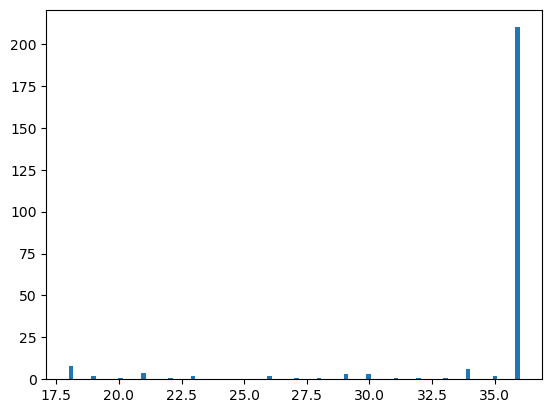

In [13]:
plt.hist(liver_slice['tumore_slice_range'],bins=100)

# ImageDataset


In [14]:
liver_slice

,Experiment,min_row,min_col,min_slice,max_row,max_col,max_slice,tumor_min_slice,tumor_max_slice,tumore_slice_range
0,CT_10033,54,127,31,362,394,119,43,79,36
1,CT_10043,62,132,127,319,388,206,124,160,36
2,CT_10104,61,143,72,330,424,111,65,101,36
3,CT_10203,48,127,113,353,419,213,146,182,36
4,CT_10702,95,140,99,318,369,164,91,127,36
...,...,...,...,...,...,...,...,...,...,...
244,CT_89320,38,148,288,339,395,430,280,316,36
245,CT_94131,43,142,75,297,412,124,80,116,36
246,CT_94912,35,162,3,306,413,39,0,27,27
247,CT_97575,96,178,0,376,381,22,0,18,18


In [21]:
import os
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from Core.Dataset.Dataloader import DataFiles,Data_Loader,Image_Dataset

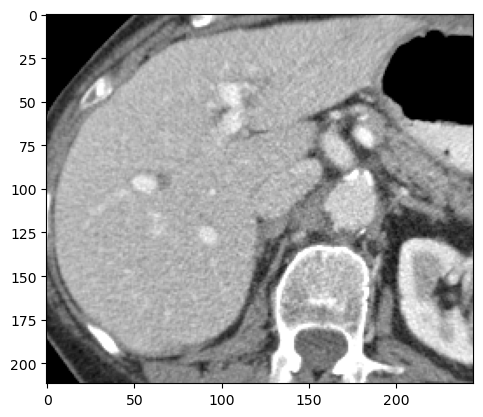

In [117]:
import SimpleITK as sitk
image = sitk.ReadImage('../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/CILM_CT_100330_0000.nii.gz')
image_array = sitk.GetArrayFromImage(image)
plt.imshow(image_array[30,:,:],cmap='gray')

In [103]:
from monai.transforms import Compose,Resize,NormalizeIntensity,EnsureChannelFirst,ToTensor,RandZoom,RandRotate,RandFlip
train_data_path = '../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/'
label_dir = '../../Data/Mixed_HGP/True_Label/scans_used_all_info.csv'
label_name = 'HGP_Type'
train_data = DataFiles(train_data_path,label_dir,label_name)
images_lst = sorted(train_data.get_images())
labels_lst = train_data.get_labels()
train_data.Data_check()
transform_param_train = {"transform_methods":[
                                    EnsureChannelFirst(),
                                    # Data augmentation
                                    NormalizeIntensity(),
                                    # To tensor
                                    ToTensor()
                                    ]}

train_images = images_lst
train_labels = labels_lst
tr_dataset = Image_Dataset(image_files=train_images,labels=train_labels,transform_methods=transform_param_train['transform_methods'],data_aug=True,label_name=None)



In [104]:
tr_dataloader = Data_Loader(dataset=tr_dataset,num_workers=0,batch_size=1).build_train_loader() 


In [126]:
from datetime import datetime

# 获取当前日期和时间
now = datetime.now()

# 获取当前月份
current_month = now.month

# 获取当前时间（时、分、秒）
current_time = now.strftime("%H:%M:%S")
print()
print("当前月份:", current_month)
print("当前时间:", current_time)


2023-12-27 15:33:47.476246
当前月份: 12
当前时间: 15:33:47


In [122]:
import torch
for im,la in tr_dataloader:
    im = torch.rot90(im,k=3,dims=(2,3))
    im = torch.flip(im,[3])
    print(im.shape)
    break

this is image and labels ../../Data/Mixed_HGP/Mixed_HGP_Only_Liver_07073_Windowed/CILM_CT_100330_0000.nii.gz 0
torch.Size([1, 1, 212, 245, 59])


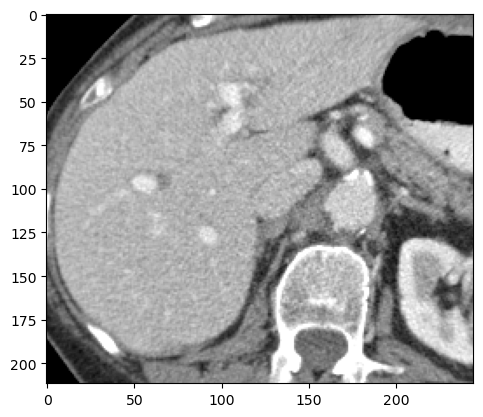

In [123]:
plt.imshow(im[0,0,:,:,30],cmap='gray')